# ML Zoomcamp - Homework lesson 3 - 2024

## Get data

In [ ]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip


--2024-10-09 09:19:14--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip.1’

bank+marketing.zip.     [    <=>             ] 999.85K  1.25MB/s    in 0.8s    

2024-10-09 09:19:15 (1.25 MB/s) - ‘bank+marketing.zip.1’ saved [1023843]



In [ ]:
zip_path = '/content/bank+marketing.zip'

import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

In [ ]:
zip_path = '/content/bank.zip'

import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

In [ ]:
import pandas as pd

csv_path = '/content/bank-full.csv'
df = pd.read_csv(csv_path, sep=";")
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
columns_to_use = ['age', 'job', 'marital', 'education', 'balance', 'housing',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']


In [ ]:
df2 = df[columns_to_use]
df2.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df2.isnull().sum()

,0
age,0
job,0
marital,0
education,0
balance,0
housing,0
contact,0
day,0
month,0
duration,0


## Question 1
What is the most frequent observation (mode) for the column education?

In [ ]:
df2.education.mode()

,education
0,secondary


In [ ]:
df2.education.value_counts()

,count
education,
secondary,23202
tertiary,13301
primary,6851
unknown,1857


**Answer**: secondary

## Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- age and balance
- day and campaign
- day and pdays
- pdays and previous


In [ ]:
df2.dtypes

,0
age,int64
job,object
marital,object
education,object
balance,int64
housing,object
contact,object
day,int64
month,object
duration,int64


In [ ]:
numerical = df2.select_dtypes(['int64']).columns.tolist()
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
correlation_matrix = df2[numerical].corr()
correlation_matrix

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


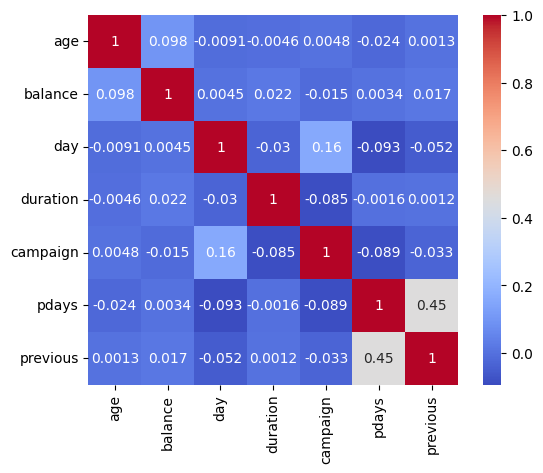

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

**Answer**: pdays and previous

## Target encoding

- Now we want to encode the y variable.
- Let's replace the values yes/no with 1/0.



In [ ]:
df2.y = (df2.y == 'yes').astype(int)


<ipython-input-63-5a55016cb326>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.y = (df2.y == 'yes').astype(int)


In [ ]:
df2.y.unique()

array([0, 1])

## Split the data

- Split your data in train/val/test sets with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value y is not in your dataframe.

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 42
df_full_train, df_test = train_test_split(df2, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=SEED)

assert len(df2) == (len(df_train) + len(df_val) + len(df_test))

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.y
y_val = df_val.y
y_test = df_test



In [ ]:
del df_train['y']

In [ ]:

del df_test['y']
del df_val['y']

In [ ]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome'],
      dtype='object')

## Question 3

Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
Round the scores to 2 decimals using round(score, 2).

Which of these variables has the biggest mutual information score?


- contact
- education
- housing
- poutcome

In [ ]:
categorical = df2.select_dtypes(['object']).columns.tolist()
categorical

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [ ]:
from sklearn.metrics import mutual_info_score

mis_contact = mutual_info_score(df_train.contact, y_train)
mis_education = mutual_info_score(df_train.education, y_train)
mis_housing = mutual_info_score(df_train.housing, y_train)
mis_poutcome = mutual_info_score(df_train.poutcome, y_train)

print(f"Contact: {round(mis_contact, 2)} \n Education: {round(mis_education,2)} \n Housing: {round(mis_housing, 2)} \n Poutcome: {round(mis_poutcome,2)}")

Contact: 0.01 
 Education: 0.0 
 Housing: 0.01 
 Poutcome: 0.03


In [ ]:
max_mis = max(mis_contact, mis_education, mis_housing, mis_poutcome)
max_mis

0.02938858721067336

**Answer** = poutcome

## Question 4

Now let's train a logistic regression.

Remember that we have several categorical variables in the dataset.

Include them using one-hot encoding.

Fit the model on the training dataset.

To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:


```

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
```

Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?


0.6

0.7

0.8

0.9

In [ ]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
X_train

array([[ 3.600e+01, -4.850e+02,  1.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00],
       [ 5.500e+01,  2.325e+03,  7.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00],
       [ 4.200e+01,  3.104e+03,  2.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00],
       ...,
       [ 5.400e+01,  0.000e+00,  1.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00],
       [ 2.500e+01,  2.311e+03,  2.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00],
       [ 3.000e+01,  1.500e+01,  2.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00]])

In [ ]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [ ]:
val_dict = df_val.to_dict(orient='records')

X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred)
accuracy_rounded = round(accuracy, 2)

print(f"Accuracy: {accuracy_rounded}")


Accuracy: 0.9


## Question 5

Let's find the least useful feature using the feature elimination technique.

Train a model with all these features (using the same parameters as in Q4).

Now exclude each feature from this set and train a model without it. Record the accuracy for each model.

For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

- age
- balance
- marital
- previous

Note: The difference doesn't have to be positive.

**Answer**: 0.9

In [ ]:
initial_score = accuracy

features = df_train.columns.tolist()
features

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [ ]:
features_to_eliminate = ['age','balance', 'marital', 'previous']

In [ ]:
original_score = accuracy
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])

for feature in features:
  subset = features.copy()
  subset.remove(feature)
  dv = DictVectorizer(sparse=False)
  train_dict = df_train[subset].to_dict(orient='records')
  X_train = dv.fit_transform(train_dict)
  model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
  model.fit(X_train, y_train)

  val_dict = df_val[subset].to_dict(orient='records')
  X_val = dv.transform(val_dict)

  y_pred = model.predict(X_val)
  score = accuracy_score(y_val, y_pred)
  scores.loc[len(scores)] = [feature, score, original_score - score]


In [ ]:
scores

,eliminated_feature,accuracy,difference
0,age,0.901438,-0.000553
1,job,0.901161,-0.000276
2,marital,0.901991,-0.001106
3,education,0.901438,-0.000553
4,balance,0.901161,-0.000276
5,housing,0.902820,-0.001935
6,contact,0.900885,0.000000
7,day,0.901023,-0.000138
8,month,0.900055,0.000829
9,duration,0.889411,0.011474


In [ ]:
scores = scores.sort_values('difference')
scores

,eliminated_feature,accuracy,difference
5,housing,0.902820,-0.001935
2,marital,0.901991,-0.001106
11,pdays,0.901576,-0.000691
0,age,0.901438,-0.000553
3,education,0.901438,-0.000553
10,campaign,0.901438,-0.000553
12,previous,0.901299,-0.000415
1,job,0.901161,-0.000276
4,balance,0.901161,-0.000276
7,day,0.901023,-0.000138


**Answer**: marital

## Question 6

Now let's train a regularized logistic regression.

Let's try the following values of the parameter C: [0, 0.01, 0.1, 1, 10].

Train models using all the features as in Q4.

Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these C leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100

Note: If there are multiple options, select the smallest C.

In [ ]:
parameters = [0.01, 0.1, 1,10,100]
results = []
for C in parameters:
  model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  accuracy = accuracy_score(y_val, y_pred)
  results.append({'C': C, 'accuracy': round(accuracy,3)})

In [ ]:
results

[{'C': 0.01, 'accuracy': 0.891},
 {'C': 0.1, 'accuracy': 0.895},
 {'C': 1, 'accuracy': 0.895},
 {'C': 10, 'accuracy': 0.895},
 {'C': 100, 'accuracy': 0.894}]

**Answer**: 0.1